In [1]:
import numpy as np
import math
import matplotlib.pylab as plt
from matplotlib import style
# style.use('ggplot')

In [2]:
!gdown --id 1o7B8XJ33OjCo8paZytvvVsxncm9wvVke

Downloading...
From: https://drive.google.com/uc?id=1o7B8XJ33OjCo8paZytvvVsxncm9wvVke
To: /content/BigData_Homework1_Data.zip
377MB [00:02, 170MB/s]


In [3]:
!unzip BigData_Homework1_Data.zip

Archive:  BigData_Homework1_Data.zip
   creating: Data/
   creating: Data/question 2_Association rules' application/
  inflating: Data/question 2_Association rules' application/browsing.txt  
   creating: Data/question 3_LSH/
   creating: Data/question 3_LSH/data/
  inflating: Data/question 3_LSH/data/patches.csv  
  inflating: Data/question 3_LSH/lsh.py  
   creating: Data/question 4_Data streams/
  inflating: Data/question 4_Data streams/counts.txt  
  inflating: Data/question 4_Data streams/counts_tiny.txt  
  inflating: Data/question 4_Data streams/hash_params.txt  
  inflating: Data/question 4_Data streams/words_stream.txt  
  inflating: Data/question 4_Data streams/words_stream_tiny.txt  


In [14]:
#pathes
dataset_path ='/content/Data/question 4_Data streams/words_stream_tiny.txt'
counts_path = '/content/Data/question 4_Data streams/counts_tiny.txt'
hash_path = '/content/Data/question 4_Data streams/hash_params.txt'


In [15]:
#parameters
delta = math.exp(-5)
epsilon = math.exp(1) * (10**-4)
p = 123457

#loading hash_parameters
hash_parameters = np.loadtxt(hash_path, delimiter = '\t', dtype = 'int')


In [16]:
#hash function
def hash(a, b, p, buckets, x):
    y = x % p
    hash_val = (a*y+b) % p
    return hash_val % buckets

In [24]:
# plotting log plot pf error
def log_plot(D,x_list, title, x_label, y_label):
    D = sorted(D.items())
    x, y = zip(*D)
    plt.figure(figsize=(8, 6))
    plt.loglog(x_list, y,'o', color='darkorange')
    plt.suptitle(title, fontsize=20)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.show()

In [18]:
def estimate(dataset_path, counts_path, delta, epsilon, p):
    upper_j = math.ceil(math.log(1 / delta))  # upper limit of j
    upper_h = math.ceil((math.exp(1)) / epsilon)  # upper limit of hashed value

    # Initialization
    C = np.zeros((upper_j, upper_h))
    F_approx = {}
    Frequencies = {}
    Errors = {}
    x_list = []
    len_stream = 0

    # Building C matrix
    with open(dataset_path) as file:
        for line in file:
            len_stream += 1
            word_id = int(line)
            F_approx[word_id] = 0
            for j in range(0, upper_j):
                a = hash_parameters[j, 0]
                b = hash_parameters[j, 1]
                word_hash = hash(a, b, p, upper_h, word_id)
                C[j][word_hash] += 1
    print(C)
    for word_id in F_approx:
        c_list = []
        for j in range(0, upper_j):
            a = hash_parameters[j, 0]
            b = hash_parameters[j, 1]
            word_hash = hash(a, b, p, upper_h, word_id)
            c_list.append(C[j][word_hash])
        F_approx[word_id] = min(c_list)


    with open(counts_path) as file:
        for line in file:
            line = line.split()
            word_id = int(line[0])
            word_count = int(line[1])
            Frequencies[word_id] = word_count

    for word_id in F_approx:
        Errors[word_id] = (F_approx[word_id] - Frequencies[word_id]) / Frequencies[word_id]

    for i in Frequencies:
        x_list.append(Frequencies[i] / float(len_stream))
    print(x_list)

    return x_list,Errors, Frequencies, F_approx

In [19]:
x_list,E, F, F_approx = estimate(dataset_path, counts_path, delta, epsilon, p)


[[  48.   56.   47. ... 2288.   56.  118.]
 [  51.   32. 2283. ...  264.  224.  219.]
 [  63.  187.  101. ...   57.  486.   23.]
 [ 337.   33.  169. ...   23.  291.  120.]
 [ 426.   75.   52. ... 3094.  424.   51.]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



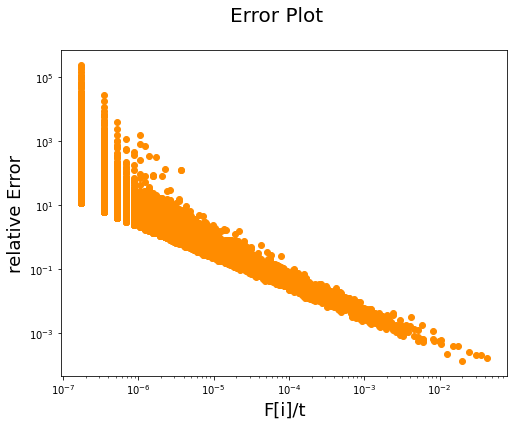

In [25]:
log_plot(E,x_list, "Error Plot", "F[i]/t", "relative Error")